In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [72]:
# Load the dataset
data = pd.read_json('News_Category_Dataset_v3.json', lines=True)

In [73]:

# Get top 10 categories
top_10_categories = data['category'].value_counts().head(10).index
data = data[data['category'].isin(top_10_categories)]

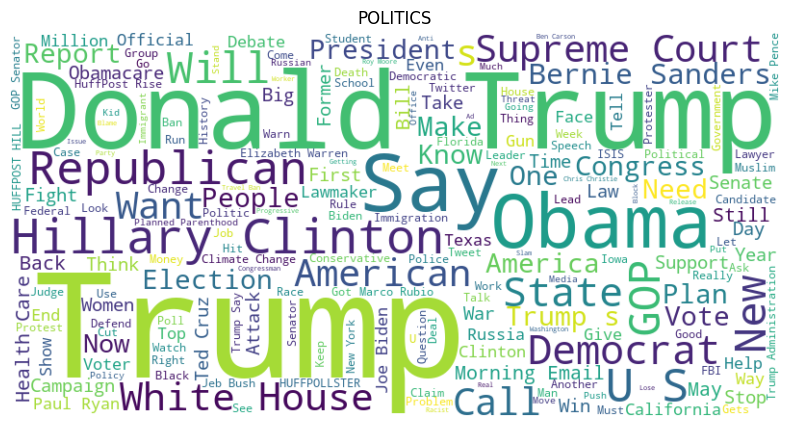

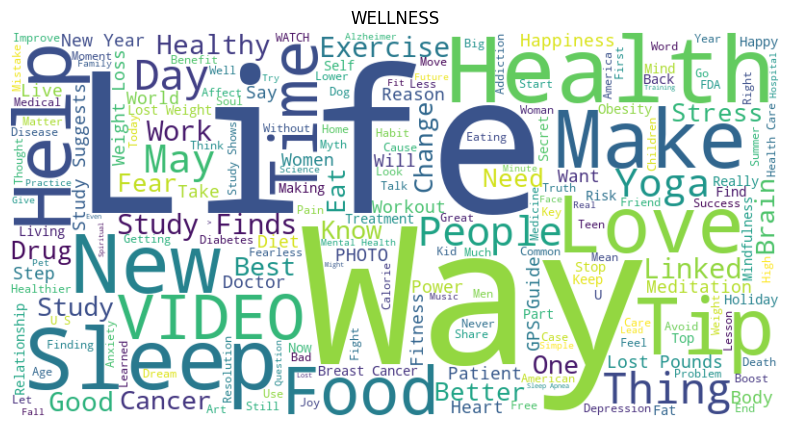

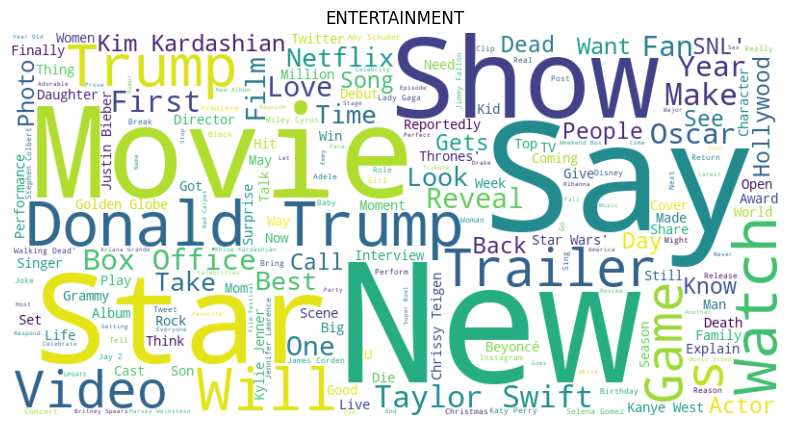

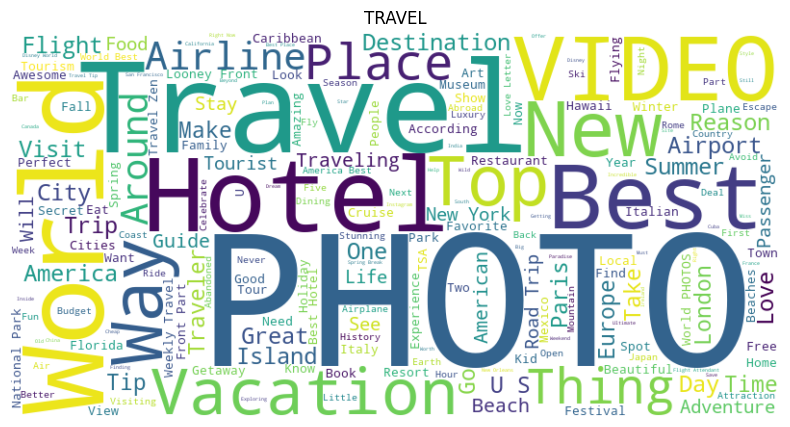

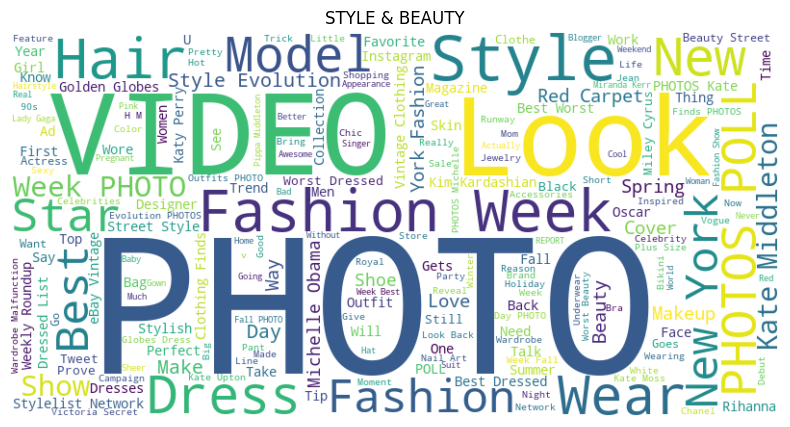

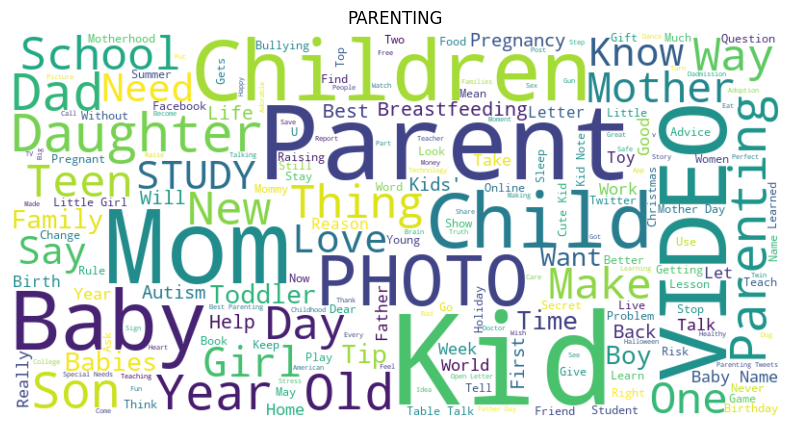

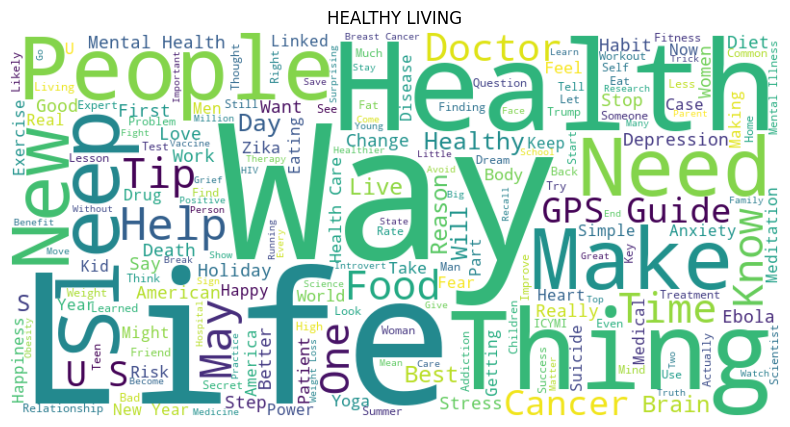

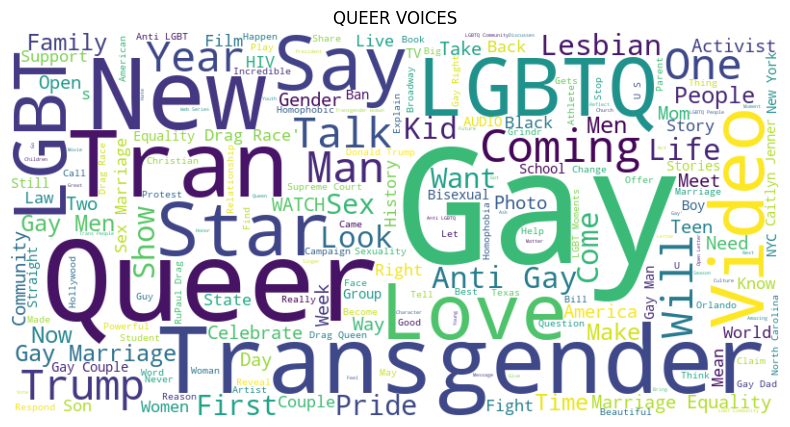

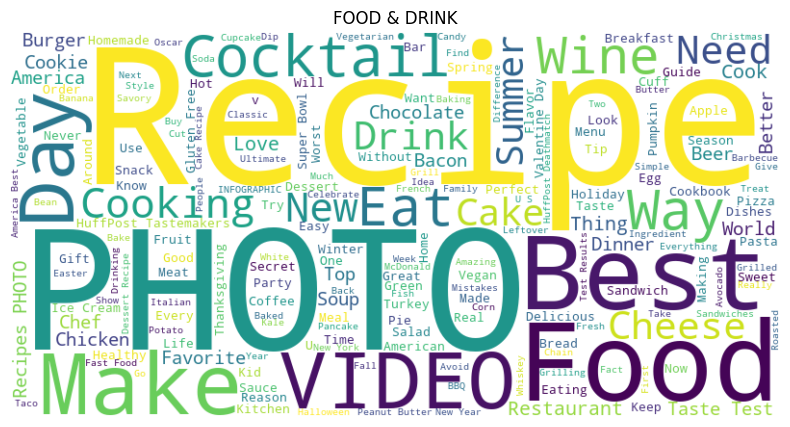

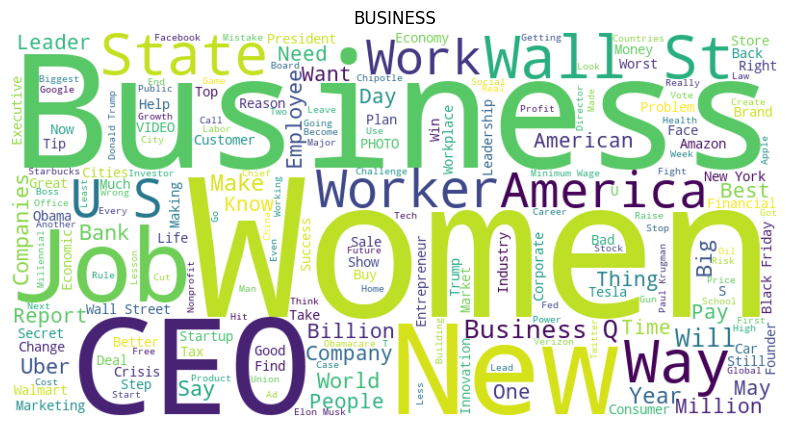

In [74]:
# Generate a word cloud for each of the top 10 categories
for category in top_10_categories:
    category_data = data[data['category'] == category]
    text = ' '.join(category_data['headline'].dropna().values)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category)
    plt.axis('off')
    plt.show()

In [75]:
top_10_categories

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS'],
      dtype='object', name='category')

In [76]:
# Create a dictionary for each class excluding stop words
stopwords = set(STOPWORDS)


In [77]:
def clean_text(text):
    return ' '.join(word for word in text.split() if word.lower() not in stopwords)


In [78]:
# Create a dictionary for each class
class_dictionaries = {}
for category in top_10_categories:
    headlines = data[data['category'] == category]['headline'].dropna().apply(clean_text).values
    word_counts = Counter(' '.join(headlines).split())
    class_dictionaries[category] = word_counts

In [79]:
class_dictionaries['FOOD & DRINK']

Counter({'(PHOTOS)': 685,
         'Recipes': 571,
         'Best': 498,
         'Food': 449,
         'Recipe': 377,
         'Make': 353,
         '10': 245,
         '(VIDEO)': 225,
         'Day:': 199,
         'New': 195,
         '5': 188,
         'Recipes:': 155,
         'Day': 154,
         'Eat': 150,
         'Ways': 144,
         'Cooking': 144,
         '(PHOTO)': 141,
         'Chocolate': 133,
         'Cake': 126,
         'Taste': 121,
         'Wine': 119,
         '&': 119,
         'Cheese': 117,
         'Foods': 116,
         'Chicken': 116,
         'Need': 115,
         'HuffPost': 115,
         'Summer': 113,
         'Cocktails': 112,
         'Top': 111,
         'Cook': 91,
         'Favorite': 91,
         'Love': 90,
         'Cream': 88,
         '7': 87,
         'Kitchen': 87,
         'Easy': 86,
         'Salad': 85,
         'Things': 84,
         'Dinner': 81,
         'Hot': 81,
         'Tastemakers:': 81,
         'Better': 79,
         'Will'

In [80]:
class_dictionaries['POLITICS']

Counter({'Trump': 6894,
         'Donald': 3094,
         "Trump's": 1906,
         'GOP': 1744,
         'Says': 1461,
         'Clinton': 1385,
         'New': 1346,
         'Hillary': 1246,
         'House': 1237,
         'Obama': 1193,
         'U.S.': 989,
         'Will': 968,
         'White': 940,
         'Court': 860,
         'Republicans': 832,
         'Senate': 794,
         'Bill': 779,
         'Democrats': 759,
         'Bernie': 694,
         'Sanders': 668,
         'Campaign': 647,
         'President': 640,
         'Election': 628,
         'Supreme': 627,
         'Health': 620,
         'Republican': 575,
         'State': 570,
         'Care': 510,
         'Democratic': 505,
         'People': 498,
         'Congress': 489,
         'Tax': 459,
         'John': 457,
         'Paul': 453,
         'Calls': 451,
         'Morning': 450,
         'Americans': 444,
         'Trump’s': 442,
         'First': 441,
         'Gun': 436,
         'Climate': 435,
    

In [81]:
# Count words in each doc that belong to each dictionary
def count_words_in_dict(headline, word_dict):
    words = clean_text(headline).split()
    unique_words = set(words) 
    count = sum(1 for word in unique_words if word in word_dict)
    return count

In [82]:
# Add word count columns for each category
for category, word_dict in class_dictionaries.items():
    data[category + '_word_count'] = data['headline'].apply(lambda x: count_words_in_dict(x, word_dict) if pd.notna(x) else 0)


In [83]:
data

,link,headline,category,short_description,authors,date,POLITICS_word_count,WELLNESS_word_count,ENTERTAINMENT_word_count,TRAVEL_word_count,STYLE & BEAUTY_word_count,PARENTING_word_count,HEALTHY LIVING_word_count,QUEER VOICES_word_count,FOOD & DRINK_word_count,BUSINESS_word_count
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,4,6,4,4,4,6,3,4,4,3
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20,6,4,7,3,4,5,4,4,4,4
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19,8,4,6,5,6,5,5,7,4,6
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,10,7,8,6,5,6,5,7,7,6
28,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,4,5,7,6,6,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209509,https://www.huffingtonpost.comhttp://jobs.aol....,Walmart Waving Goodbye To Some Greeters,BUSINESS,"After 30 years, ""People Greeters"" will no long...",,2012-01-28,3,2,3,2,2,3,1,0,2,4
209510,https://www.huffingtonpost.com/entry/world-eco...,"At World Economic Forum, Fear of Global Contag...",BUSINESS,"For decades, as crises have assailed developin...","Peter S. Goodman, Contributor\nExecutive Busin...",2012-01-28,6,5,5,4,2,4,3,5,3,7
209511,https://www.huffingtonpost.com/entry/positive-...,Positive Customer Experience: What's the Retur...,BUSINESS,"""Analysts at Adobe combined historical purchas...","Ernan Roman, Contributor\nPresident",2012-01-28,3,3,3,3,3,3,3,3,1,5
209512,https://www.huffingtonpost.com/entry/sundance-...,"Sundance, Ice-T, and Shades of the American Ra...",ENTERTAINMENT,Representation of the collective diaspora has ...,"Courtney Garcia, Contributor\nI tell stories a...",2012-01-28,3,3,6,4,4,3,3,3,2,2


In [84]:
data['headline'].iloc[1]

'Golden Globes Returning To NBC In January After Year Off-Air'

In [85]:
# Predict category based on the highest word count
def predict_category(row):
    # Dictionary to hold word counts for each category
    category_counts = {category: row[category + '_word_count'] for category in top_10_categories}
    # Predict the category with the highest count
    predicted_category = max(category_counts, key=category_counts.get)
    return predicted_category


In [86]:
# Apply the prediction function to each row
data['predicted_category'] = data.apply(predict_category, axis=1)


In [92]:
# Evaluate the accuracy of the prediction
accuracy = (data['category'] == data['predicted_category']).mean()
print("Accuracy:", accuracy)


Accuracy: 0.7407021564746328


In [89]:
# Display real and predicted categories
display_columns = ['category', 'predicted_category'] 
print(data[display_columns].head())


         category predicted_category
3       PARENTING           WELLNESS
20  ENTERTAINMENT      ENTERTAINMENT
21       POLITICS           POLITICS
24       POLITICS           POLITICS
28  ENTERTAINMENT      ENTERTAINMENT


In [93]:
data.iloc[1]

link                         https://www.huffpost.com/entry/golden-globes-r...
headline                     Golden Globes Returning To NBC In January Afte...
category                                                         ENTERTAINMENT
short_description            For the past 18 months, Hollywood has effectiv...
authors                                                                       
date                                                       2022-09-20 00:00:00
POLITICS_word_count                                                          6
WELLNESS_word_count                                                          4
ENTERTAINMENT_word_count                                                     7
TRAVEL_word_count                                                            3
STYLE & BEAUTY_word_count                                                    4
PARENTING_word_count                                                         5
HEALTHY LIVING_word_count                           